# PID Tuning using the good old Ziegler-Nichols method

We write our PID control as following:

$u(t)=K_p\left(e(t)+\frac{1}{T_i}\int_0^t e(\tau)d\tau + T_d \frac{de(t)}{dt} \right)$

Our parameters are then $K_p$ the proportional gain, $T_i$ the integrator time constant and $T_d$ the derivative time constant.

Higher $K_p$ means faster response.

Lower $T_i$ means faster response (0 to disable).

Higher $T_d$ means faster respons.

Then, $\frac{T_i}{K_p}$ represents how long the controller will "tolerate" a static error.

$K_p T_d$ represents the time constant with which the controller will approach the set point.


https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method

In [1]:
import orbita_sdk
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
orb=orbita_sdk.orbita.OrbitaSDK('/dev/tty.usbserial-0001')

In [3]:
orb.get_pid()

(0.15000000596046448, 0.02500000037252903, 0.016499999910593033)

Start with all parameters to 0

In [8]:
orb.set_pid(0.0,0.0,0.0)

Find $K_u$ the "critical gain", the lowest gain at which consistent oscillation occur, along with $T_u$ the critical oscillation period. 

In [4]:
def step():
    disks=[]
    goals=[]
    orb.set_target_disk_position([0,0,0])
    time.sleep(3)
    goal=0.0
    for i in range(400):
        if i == 50:
            goal=2*np.pi
            orb.set_target_disk_position([goal,goal,goal])
        goals.append(goal)
        disks.append(orb.get_current_disk_position())
        time.sleep(0.005)
    disks=np.array(disks)
    goals=np.array(goals)
    %matplotlib notebook
    fig, ax = plt.subplots()
    ax.plot(disks,label='pos')
    ax.plot(goals,label='target')
    ax.set_ylim(6, 6.5)
    ax.legend()

<IPython.core.display.Javascript object>


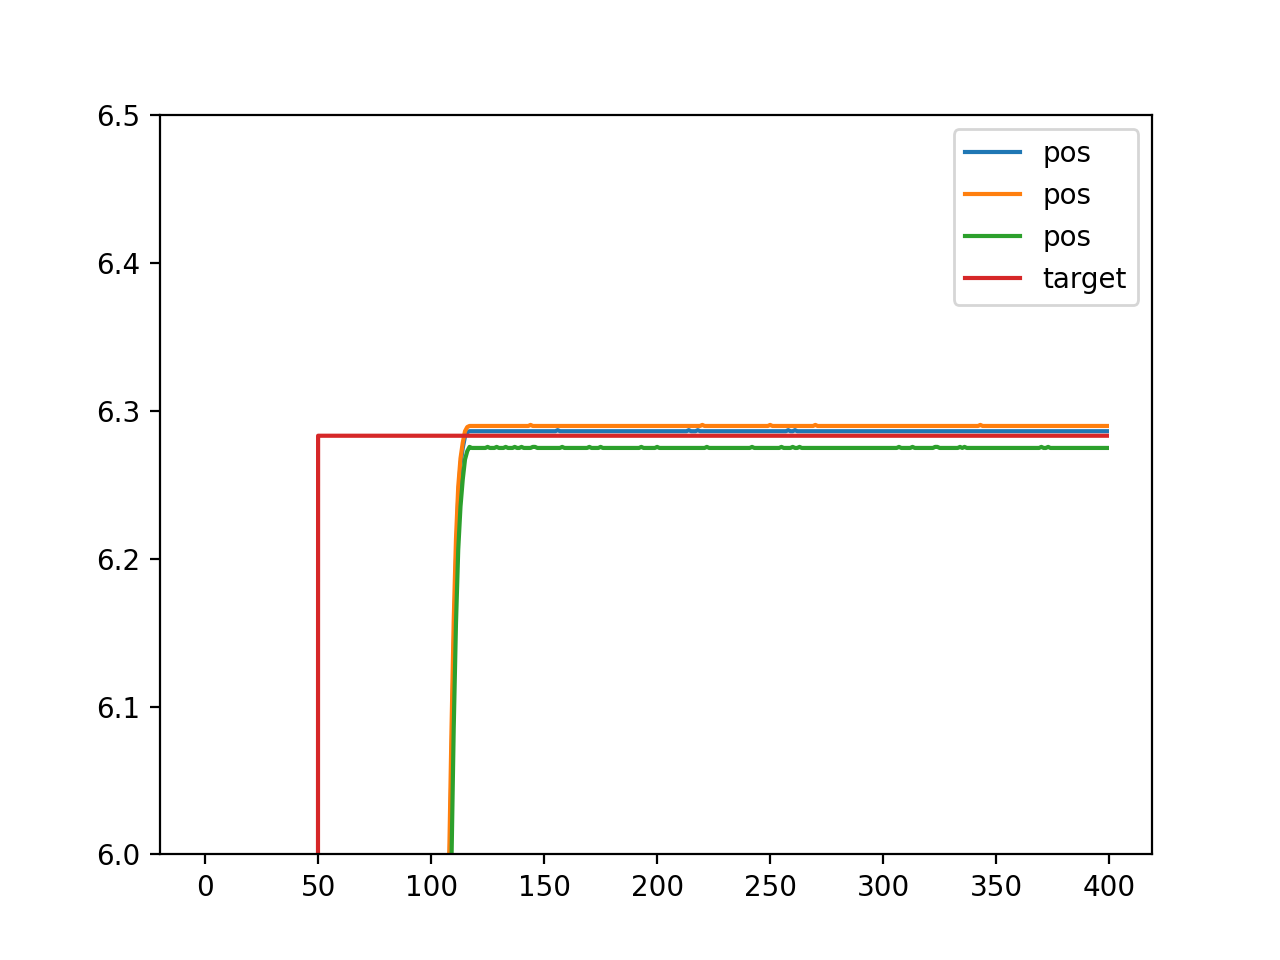

In [5]:
step()

In [6]:
orb.enable_torque()

<IPython.core.display.Javascript object>


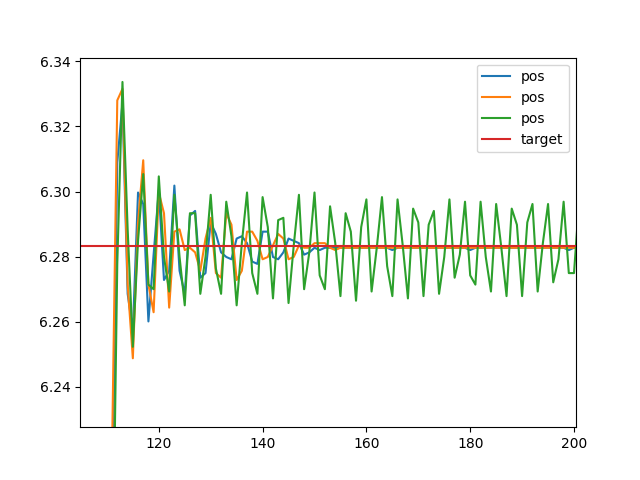

In [15]:
orb.set_pid(3.0, 0.0, 0.0)
step()

In [126]:
orb.disable_torque()

We find a $K_u=1.4$ with $T_u=0.05s$

In [37]:
Ku=0.5
Tu=0.05

The "classic" PID values are then:

In [38]:
orb.set_pid(Ku*0.6,Tu*0.5,Tu*0.125)

<IPython.core.display.Javascript object>


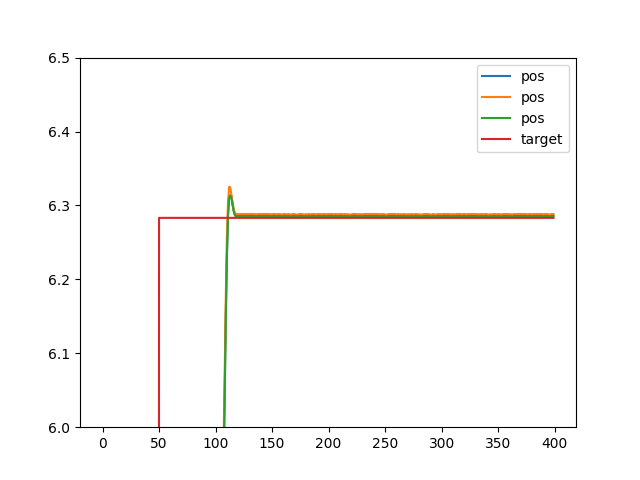

In [39]:
step()

The tuning with some overshoot:

In [20]:
orb.set_pid(Ku*0.33,Tu*0.5,Tu*0.33)

<IPython.core.display.Javascript object>


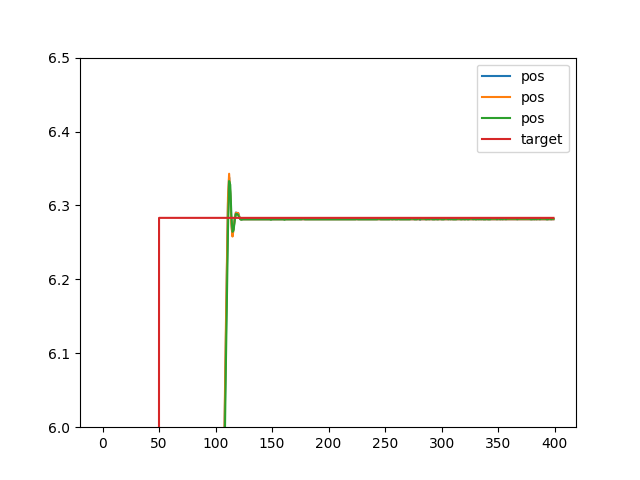

In [21]:
step()

The tuning with no overshoot:

In [44]:
orb.set_pid(Ku*0.3,Tu*0.5,Tu*0.33)

<IPython.core.display.Javascript object>


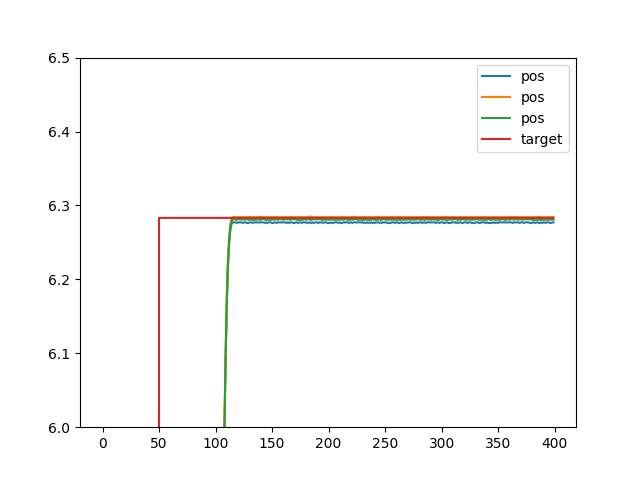

In [45]:
step()

In [20]:
orb.get_pid()

(0.2800000011920929, 0.02500000037252903, 0.016499999910593033)

In [166]:
orb.enable_torque()

In [9]:
orb.disable_torque()

In [8]:
orb.set_target_disk_position((0, 0, 0))